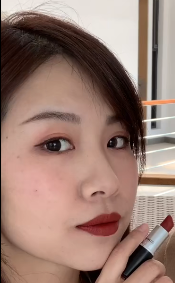

In [243]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display


def show_image(img):
    """
    Show image in a window
    """
    display(Image.fromarray(img))


image_name = "test_face8.png"

image = cv2.imread(image_name)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)

show_image(image_rgb)


In [244]:
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh

# Load drawing_utils and drawing_styles
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

FACE_MESH_OUTER_LIP = [
    (61, 146), (146, 91), (91, 181), (181, 84), (84, 17), (17, 314), (314, 405),
    (405, 321), (321, 375), (375, 291), (291, 409), (409, 270), (270, 269), 
    (269, 267), (267, 0), (0, 37), (37, 39), (39, 40), (40, 185), (185, 61),
]

FACE_MESH_INNER_LIP = [
    (78, 95), (95, 88), (88, 178), (178, 87), (87, 14), (14, 317), (317, 402), 
    (402, 318), (318, 324), (324, 308), (308, 415), (415, 310), (310, 311), 
    (311, 312), (312, 13), (13, 82), (82, 81), (81, 80), (80, 191), (191, 78),
]

FACE_MESH_LEFT_LOWER_EYEBROW = frozenset([
    (276, 283), (283, 282), (282, 295), (295, 285)
])

FACE_MESH_LEFT_UPPER_EYEBROW = frozenset([
    (300, 293), (293, 334), (334, 296), (296, 336)
])

FACE_MESH_LEFT_EYEBROW_CONNECTIONS = frozenset([(336, 285), (276, 300)])

FACE_MESH_LEFT_EYEBROW_CONTOURS = frozenset().union(*[
    FACE_MESH_LEFT_UPPER_EYEBROW, 
    FACE_MESH_LEFT_LOWER_EYEBROW, 
    FACE_MESH_LEFT_EYEBROW_CONNECTIONS
])

FACE_MESH_RIGHT_LOWER_EYEBROW = frozenset([
    (46, 53), (53, 52), (52, 65), (65, 55)
])

FACE_MESH_RIGHT_UPPER_EYEBROW = frozenset([
    (70, 63), (63, 105), (105, 66), (66, 107)
])

FACE_MESH_RIGHT_EYEBROW_CONNECTIONS = frozenset([(107, 55), (46, 70)])

FACE_MESH_RIGHT_EYEBROW_CONTOURS = frozenset().union(*[
    FACE_MESH_RIGHT_UPPER_EYEBROW,
    FACE_MESH_RIGHT_LOWER_EYEBROW,
    FACE_MESH_RIGHT_EYEBROW_CONNECTIONS
])

FACE_MESH_LEFT_CHEEK = [
    (451, 450), (450, 449), (449, 448), (448, 261), (261, 265),
    (265, 372), (372, 345), (345, 352), (352, 376), (376, 433),
    (433, 416), (416, 434), (434, 432), (432, 436), (436, 426),
    (426, 266), (266, 329), (329, 349), (349, 451)
]

FACE_MESH_RIGHT_CHEEK = [
    (231, 230), (230, 229), (229, 228), (228, 31), (31, 35),
    (35, 143), (143, 116), (116, 123), (123, 147), (147, 213),
    (213, 192), (192, 214), (214, 212), (212, 216), (216, 206),
    (206, 36), (36, 100), (100, 120), (120, 231)
]

FACE_MESH_CHIN = [
    (43, 106), (106, 182), (182, 83), (83, 18), (18, 313),
    (313, 406), (406, 335), (335, 273), (273, 422), (422, 430),
    (430, 394), (394, 395), (395, 369), (369, 396), (396, 175),
    (175, 171), (171, 140), (140, 170), (170, 169), (169, 210),
    (210, 202), (202, 43)
]


In [245]:
def get_face_mesh(img_rgb):
    # Run MediaPipe Face Mesh.
    with mp_face_mesh.FaceMesh(
            static_image_mode=True,
            refine_landmarks=True,
            max_num_faces=2,
            min_detection_confidence=0.7) as face_mesh:
        results = face_mesh.process(img_rgb)
        # annotated_image = image_rgb.copy()
        # for face_landmarks in results.multi_face_landmarks:
            # mp_drawing.draw_landmarks(
            #     image=annotated_image,
            #     landmark_list=face_landmarks,
            #     connections=mp_face_mesh.FACEMESH_TESSELATION,
            #     landmark_drawing_spec=None,
            #     connection_drawing_spec=mp_drawing_styles
            #     .get_default_face_mesh_tesselation_style())
            # for i, landmark in enumerate(face_landmarks.landmark):
            #     landmark_px = mp_drawing._normalized_to_pixel_coordinates(landmark.x, landmark.y, image.shape[1], image.shape[0])
            #     cv2.putText(annotated_image, str(i), landmark_px, cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1)
            # mp_drawing.draw_landmarks(
            #     image=annotated_image,
            #     landmark_list=face_landmarks,
            #     connections=mp_face_mesh.FACEMESH_FACE_OVAL,
            #     landmark_drawing_spec=None,
            #     connection_drawing_spec=mp_drawing_styles
            #     .get_default_face_mesh_contours_style())
        #     mp_drawing.draw_landmarks(
        #         image=annotated_image,
        #         landmark_list=face_landmarks,
        #         connections=FACE_MESH_OUTER_LIP,
        #         landmark_drawing_spec=None,
        #         connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 48, 48), thickness=2))
        #     mp_drawing.draw_landmarks(
        #         image=annotated_image,
        #         landmark_list=face_landmarks,
        #         connections=FACE_MESH_INNER_LIP,
        #         landmark_drawing_spec=None,
        #         connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 48, 48), thickness=2))
        #     mp_drawing.draw_landmarks(
        #         image=annotated_image,
        #         landmark_list=face_landmarks,
        #         connections=FACE_MESH_LEFT_CHEEK,
        #         landmark_drawing_spec=None,
        #         connection_drawing_spec=mp_drawing.DrawingSpec(color=(48, 255, 48), thickness=2))
        #     mp_drawing.draw_landmarks(
        #         image=annotated_image,
        #         landmark_list=face_landmarks,
        #         connections=FACE_MESH_RIGHT_CHEEK,
        #         landmark_drawing_spec=None,
        #         connection_drawing_spec=mp_drawing.DrawingSpec(color=(48, 255, 48), thickness=2))
        #     mp_drawing.draw_landmarks(
        #         image=annotated_image,
        #         landmark_list=face_landmarks,
        #         connections=FACE_MESH_CHIN,
        #         landmark_drawing_spec=None,
        #         connection_drawing_spec=mp_drawing.DrawingSpec(color=(48, 255, 48), thickness=2))
        # show_image(annotated_image)
        return results.multi_face_landmarks

In [246]:
landmark_list = get_face_mesh(image_rgb)

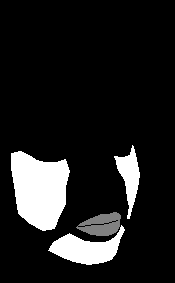

In [247]:
def get_skin_mask(image_shape, landmark_list):
    if landmark_list is None:
        return None
    mask = np.zeros(image_shape[:2], dtype=np.uint8)
    for face_landmarks in landmark_list:
        landmarks = face_landmarks.landmark
        # fill chin
        chin_polygon = []
        for chin_point in FACE_MESH_CHIN:
            chin_point_px = mp_drawing._normalized_to_pixel_coordinates(
                landmarks[chin_point[1]].x, 
                landmarks[chin_point[1]].y, 
                image_shape[1], 
                image_shape[0]
            )
            chin_polygon.append(chin_point_px)
        cv2.fillPoly(mask, pts=[np.array(chin_polygon, dtype=np.int32)], color=255)
        # fill left cheek
        left_cheek_polygon = []
        for left_cheek_point in FACE_MESH_LEFT_CHEEK:
            left_cheek_point_px = mp_drawing._normalized_to_pixel_coordinates(
                landmarks[left_cheek_point[1]].x, 
                landmarks[left_cheek_point[1]].y, 
                image_shape[1], 
                image_shape[0]
            )
            left_cheek_polygon.append(left_cheek_point_px)
        cv2.fillPoly(mask, pts=[np.array(left_cheek_polygon, dtype=np.int32)], color=255)
        # fill right cheek
        right_cheek_polygon = []
        for right_cheek_point in FACE_MESH_RIGHT_CHEEK:
            right_cheek_point_px = mp_drawing._normalized_to_pixel_coordinates(
                landmarks[right_cheek_point[1]].x, 
                landmarks[right_cheek_point[1]].y, 
                image_shape[1], 
                image_shape[0]
            )
            right_cheek_polygon.append(right_cheek_point_px)
        cv2.fillPoly(mask, pts=[np.array(right_cheek_polygon, dtype=np.int32)], color=255)
        # fill outer lip
        outer_lip_polygon = []
        for outer_lip_point in FACE_MESH_OUTER_LIP:
            outer_lip_point_px = mp_drawing._normalized_to_pixel_coordinates(
                landmarks[outer_lip_point[1]].x, 
                landmarks[outer_lip_point[1]].y, 
                image_shape[1], 
                image_shape[0]
            )
            outer_lip_polygon.append(outer_lip_point_px)
        cv2.fillPoly(mask, pts=[np.array(outer_lip_polygon, dtype=np.int32)], color=128)
        # fill inner lip
        inner_lip_polygon = []
        for inner_lip_point in FACE_MESH_INNER_LIP:
            inner_lip_point_px = mp_drawing._normalized_to_pixel_coordinates(
                landmarks[inner_lip_point[1]].x, 
                landmarks[inner_lip_point[1]].y, 
                image_shape[1], 
                image_shape[0]
            )
            inner_lip_polygon.append(inner_lip_point_px)
        cv2.fillPoly(mask, pts=[np.array(inner_lip_polygon, dtype=np.int32)], color=0)
    return mask


mask = get_skin_mask(image.shape, landmark_list)
show_image(mask)

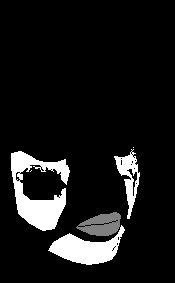

In [248]:
lower_hsv_values = np.array([6, 40, 0], dtype = "uint8")
upper_hsv_values = np.array([25, 100, 255], dtype = "uint8")

lower_y_cr_cb_values = np.array((0, 138, 67), dtype = "uint8")
upper_y_cr_cb_values = np.array((255, 150, 133), dtype = "uint8")

for x, y in zip(*np.where(mask == 255)):
    if (image_hsv[x, y, 0] > 25 or image_hsv[x, y, 0] < 6) or (image_hsv[x, y, 1] > 150 or image_hsv[x, y, 1] < 50):
        mask[x, y] = 0


show_image(mask)

[[  7.059406   88.15842   151.0495   ]
 [  7.932021   75.127014  202.04292  ]
 [  7.3353295  72.91917   218.87576  ]
 [  6.331984   86.03644   164.38867  ]
 [  6.75      143.125      88.       ]
 [  6.571429  116.52381   125.190475 ]
 [  7.596154   77.27198   196.18407  ]
 [  6.975309   96.77778   142.2963   ]
 [  6.486068   81.06811   205.56966  ]
 [  6.3157897  85.73684   104.26316  ]
 [  7.387755   73.755104  157.14285  ]
 [  6.890625   80.671875  184.67188  ]
 [  6.4848967  71.87917   224.26074  ]
 [  7.924138   72.27126   206.22069  ]
 [  6.2815533  93.572815  159.65048  ]
 [  8.466667   59.333336  173.8      ]
 [  6.714681   76.47091   213.69252  ]
 [  6.3694777  88.12851   171.78714  ]
 [  7.159091   93.86364   126.659096 ]
 [  7.045455  129.90909   105.72728  ]]


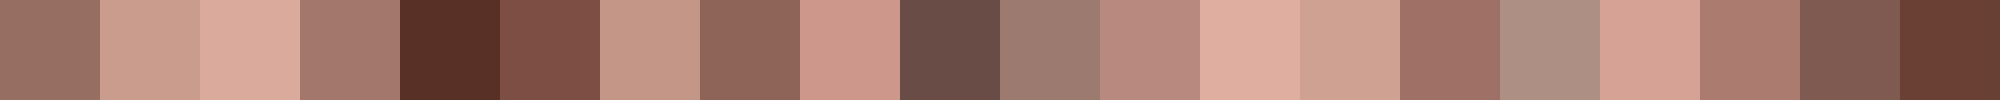

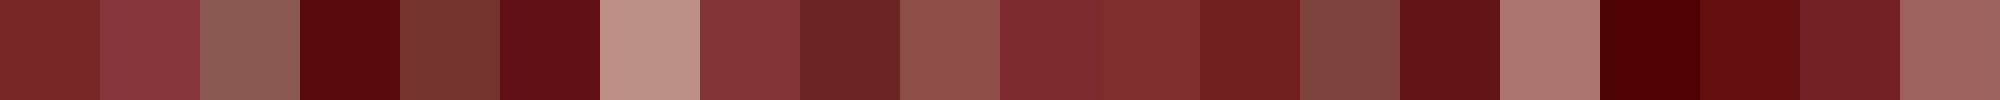

In [249]:
def get_colors_kmeans(values, K=20):
    Z = np.float32(values)
    # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.0001)
    criteria = (cv2.TERM_CRITERIA_EPS, 100, 0.00001)
    compactness, labels, centers = cv2.kmeans(Z, K, None, criteria, 50, cv2.KMEANS_PP_CENTERS)
    colors = centers
    return colors

def get_palette(colors, size=100, K=10):
    palette = np.zeros((size, K * size, 3), dtype=np.uint8)
    for i in range(colors.shape[0]):
        palette[:, i * size : (i + 1) * size, :] = colors[i, :]
    return palette

skin_k = 20
skin_colors = get_colors_kmeans(image_hsv[mask == 255], K=skin_k)
skin_palette = get_palette(skin_colors, size=100, K=skin_k)
lip_k = 20
lip_colors = get_colors_kmeans(image_hsv[mask == 128], K=lip_k)
lip_palette = get_palette(lip_colors, size=100, K=lip_k)
print(skin_colors)
# show_image(image_rgb)
show_image(cv2.cvtColor(skin_palette, cv2.COLOR_HSV2RGB))
show_image(cv2.cvtColor(lip_palette, cv2.COLOR_HSV2RGB))
# show_image(cv2.cvtColor(skin_palette, cv2.COLOR_YCR_CB2RGB))
# show_image(cv2.cvtColor(lip_palette, cv2.COLOR_YCR_CB2RGB))

In [250]:
def get_histogram_vector(hsv_colors, density=False, normalized=False):
  h_hist, h_hist_edges = np.histogram(hsv_colors[:,0], bins=18, range=(0, 179), density=density)
  # h_hist, h_hist_edges = np.histogram(hsv_colors[:,0], bins=16, range=(0, 255), density=density)
  s_hist, h_hist_edges = np.histogram(hsv_colors[:,1], bins=16, range=(0, 255), density=density)
  v_hist, h_hist_edges = np.histogram(hsv_colors[:,2], bins=16, range=(0, 255), density=density)
  v = np.concatenate((h_hist, s_hist, v_hist), axis=None)
  if normalized:
    return v / np.sqrt(np.sum(v ** 2))
  else:
    return v

skin_vector = get_histogram_vector(skin_colors)
print(skin_vector)
lip_vector = get_histogram_vector(lip_colors)
print(lip_vector)


[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  7  8
  1  1  2  0  0  0  0  0  0  0  0  0  0  0  0  1  2  2  1  2  4  1  4  2
  1  0]
[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  1  1
  2  1  1  3  4  2  1  2  1  1  0  0  0  0  1  1  4  7  3  2  1  1  0  0
  0  0]


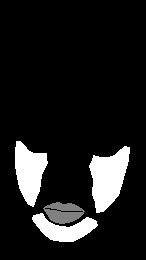

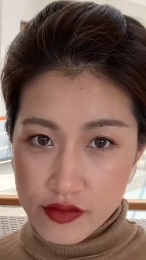

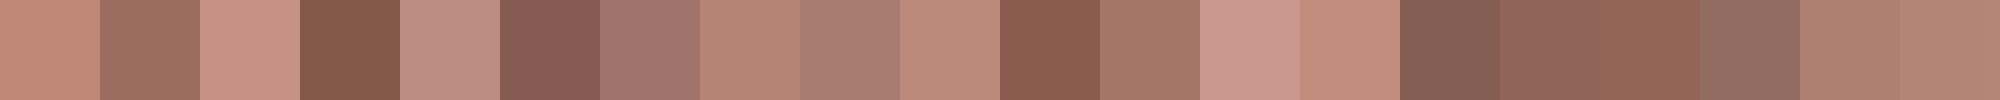

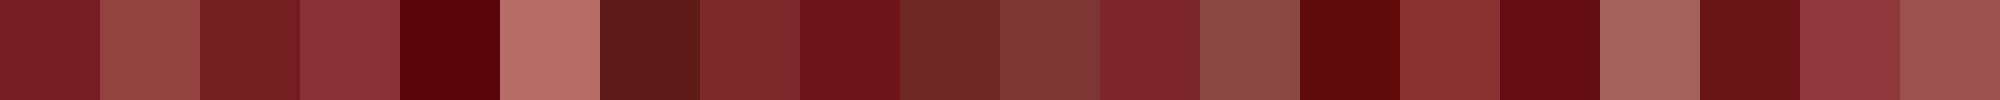

[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2 11
  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  4  4  4  4  0
  0  0]
[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0
  1  1  2  3  4  4  2  2  1  0  0  0  0  0  0  2  5  5  3  3  1  1  0  0
  0  0]


In [251]:
image2_name = 'test_face9.png'
image2 = cv2.imread(image2_name)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image2_hsv = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)
image2_ycrcb = cv2.cvtColor(image2, cv2.COLOR_BGR2YCR_CB)
landmark_list2 = get_face_mesh(image2_rgb)
mask2 = get_skin_mask(image2.shape, landmark_list2)
show_image(mask2)
show_image(image2_rgb)
skin2_colors = get_colors_kmeans(image2_hsv[mask2 == 255], K=skin_k)
skin2_palette = get_palette(skin2_colors, size=100, K=skin_k)
lip2_colors = get_colors_kmeans(image2_hsv[mask2 == 128], K=lip_k)
lip2_palette = get_palette(lip2_colors, size=100, K=lip_k)
show_image(cv2.cvtColor(skin2_palette, cv2.COLOR_HSV2RGB))
show_image(cv2.cvtColor(lip2_palette, cv2.COLOR_HSV2RGB))
# show_image(cv2.cvtColor(skin2_palette, cv2.COLOR_YCR_CB2RGB))
# show_image(cv2.cvtColor(lip2_palette, cv2.COLOR_YCR_CB2RGB))
skin2_vector = get_histogram_vector(skin2_colors)
print(skin2_vector)
lip2_vector = get_histogram_vector(lip2_colors)
print(lip2_vector)

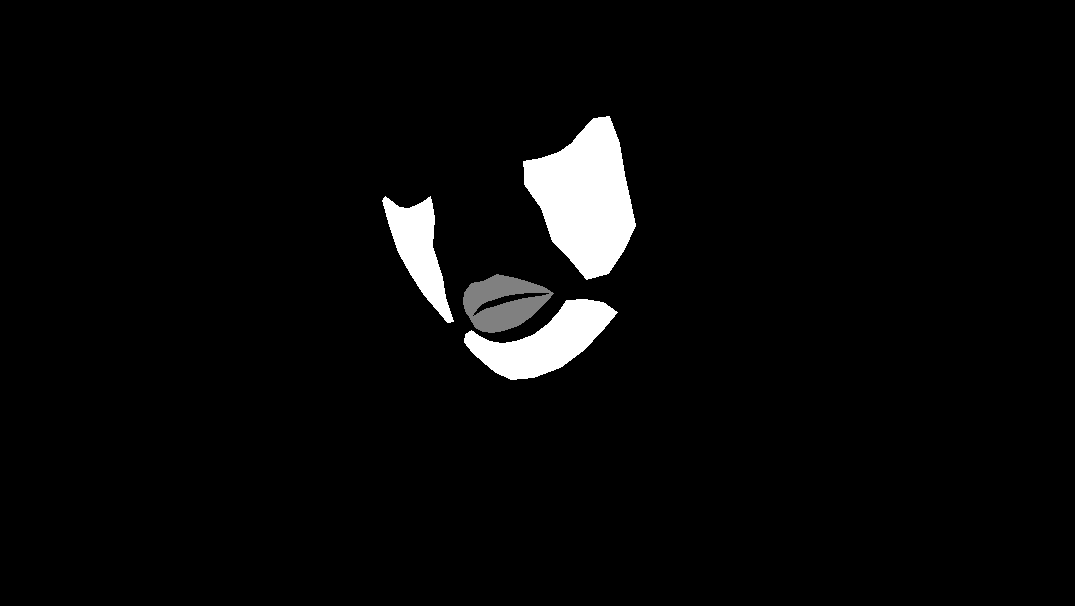

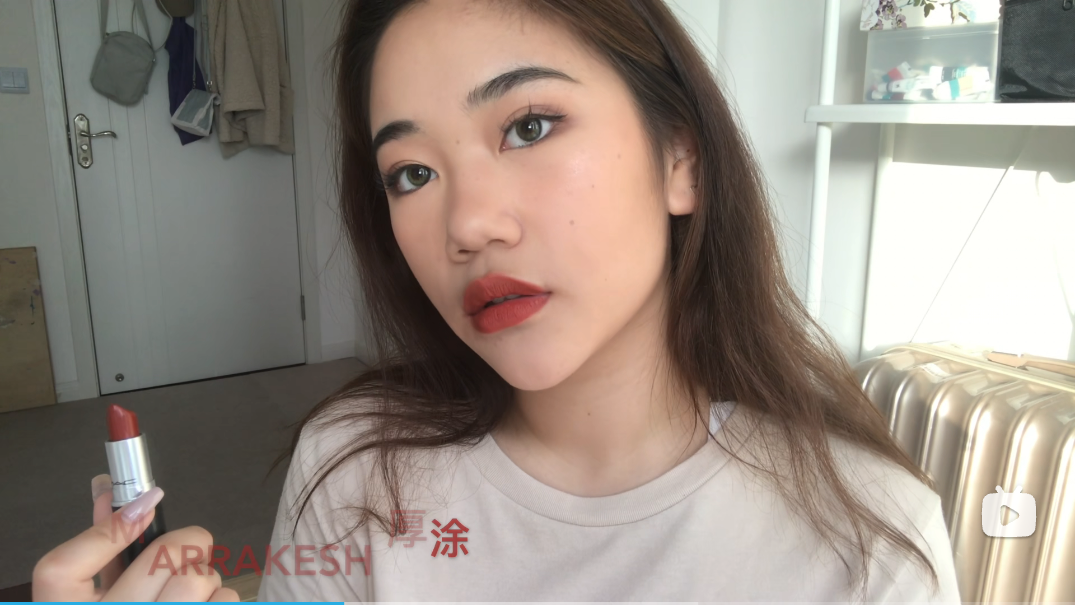

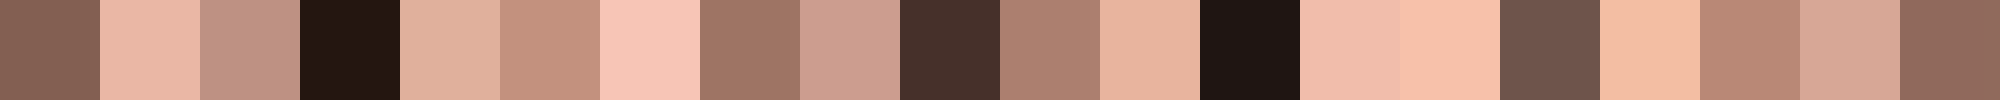

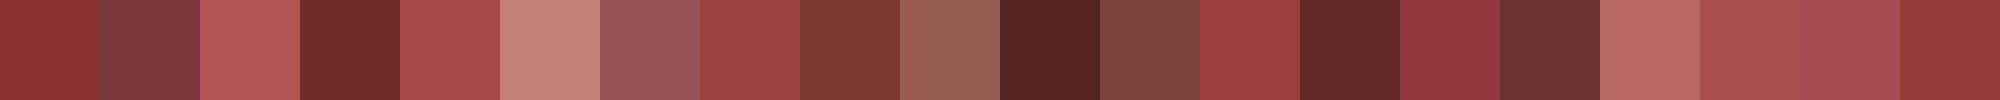

[19  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  9
  2  0  1  0  0  0  0  0  0  0  0  1  1  0  1  0  1  0  1  2  1  2  2  1
  3  4]
[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0
  1  4  5  9  1  0  0  0  0  0  0  0  0  0  0  1  2  4  1  6  3  2  1  0
  0  0]


In [252]:
image3_name = 'test_face4.png'
image3 = cv2.imread(image3_name)
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image3_hsv = cv2.cvtColor(image3, cv2.COLOR_BGR2HSV)
image3_ycrcb = cv2.cvtColor(image3, cv2.COLOR_BGR2YCR_CB)
landmark_list3 = get_face_mesh(image3_rgb)
mask3 = get_skin_mask(image3.shape, landmark_list3)
show_image(mask3)
show_image(image3_rgb)
skin3_colors = get_colors_kmeans(image3_hsv[mask3 == 255], K=skin_k)
skin3_palette = get_palette(skin3_colors, size=100, K=skin_k)
lip3_colors = get_colors_kmeans(image3_hsv[mask3 == 128], K=lip_k)
lip3_palette = get_palette(lip3_colors, size=100, K=lip_k)
show_image(cv2.cvtColor(skin3_palette, cv2.COLOR_HSV2RGB))
show_image(cv2.cvtColor(lip3_palette, cv2.COLOR_HSV2RGB))
# show_image(cv2.cvtColor(skin2_palette, cv2.COLOR_YCR_CB2RGB))
# show_image(cv2.cvtColor(lip2_palette, cv2.COLOR_YCR_CB2RGB))
skin3_vector = get_histogram_vector(skin3_colors)
print(skin3_vector)
lip3_vector = get_histogram_vector(lip3_colors)
print(lip3_vector)

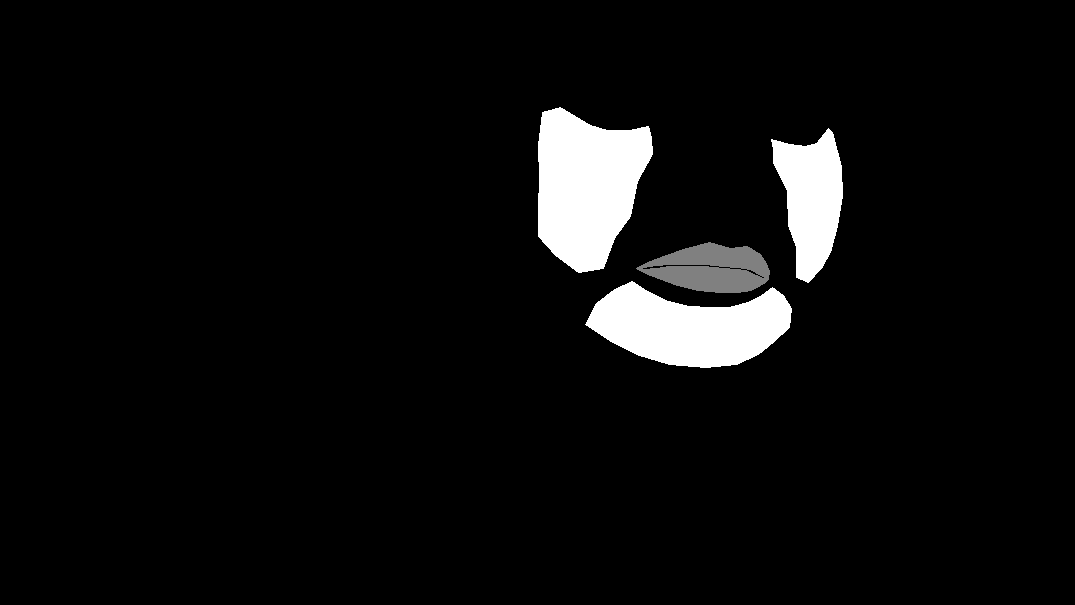

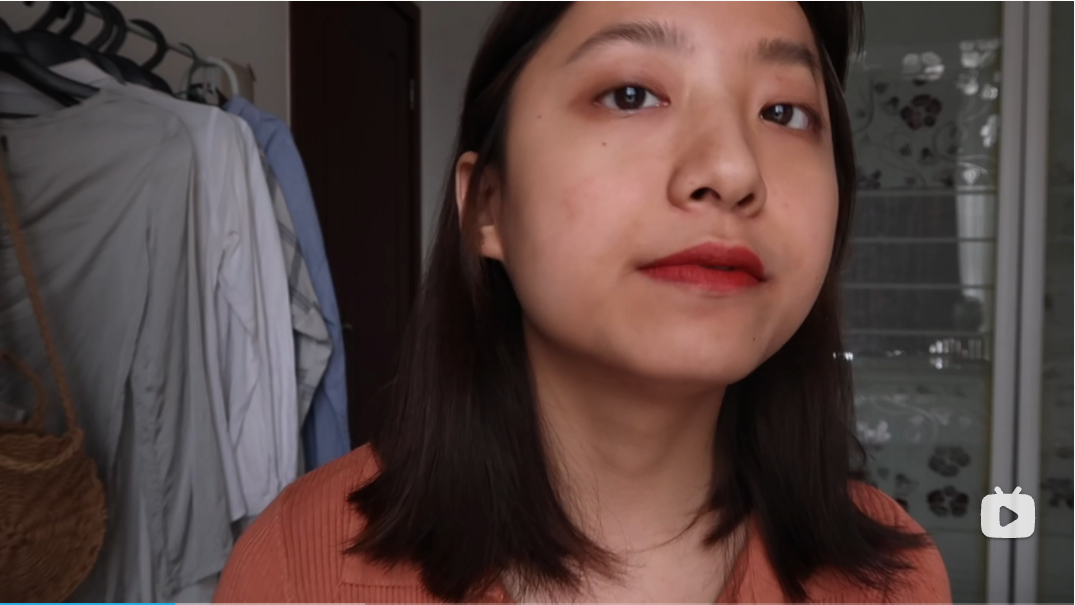

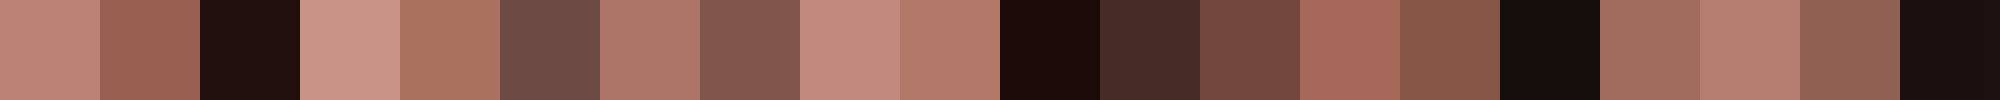

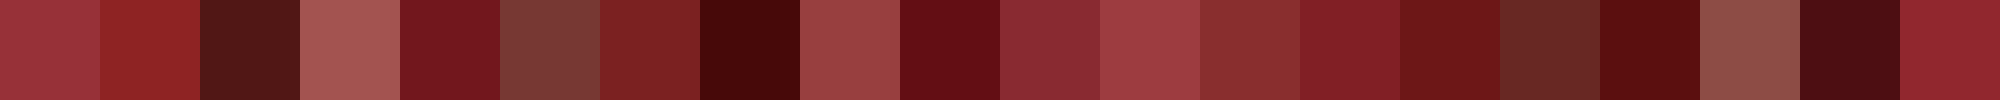

[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  4
  7  7  0  1  0  1  0  0  0  0  0  3  1  0  1  0  1  1  2  2  4  3  2  0
  0  0]
[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0
  0  0  2  3  3  5  3  4  0  0  0  0  0  0  2  2  3  3  5  4  1  0  0  0
  0  0]


In [253]:
image4_name = 'test_face5.png'
image4 = cv2.imread(image4_name)
image4_rgb = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
image4_hsv = cv2.cvtColor(image4, cv2.COLOR_BGR2HSV)
image4_ycrcb = cv2.cvtColor(image4, cv2.COLOR_BGR2YCR_CB)
landmark_list4 = get_face_mesh(image4_rgb)
mask4 = get_skin_mask(image4.shape, landmark_list4)
show_image(mask4)
show_image(image4_rgb)
skin4_colors = get_colors_kmeans(image4_hsv[mask4 == 255], K=skin_k)
skin4_palette = get_palette(skin4_colors, size=100, K=skin_k)
lip4_colors = get_colors_kmeans(image4_hsv[mask4 == 128], K=lip_k)
lip4_palette = get_palette(lip4_colors, size=100, K=lip_k)
show_image(cv2.cvtColor(skin4_palette, cv2.COLOR_HSV2RGB))
show_image(cv2.cvtColor(lip4_palette, cv2.COLOR_HSV2RGB))
# show_image(cv2.cvtColor(skin2_palette, cv2.COLOR_YCR_CB2RGB))
# show_image(cv2.cvtColor(lip2_palette, cv2.COLOR_YCR_CB2RGB))
skin4_vector = get_histogram_vector(skin4_colors)
print(skin4_vector)
lip4_vector = get_histogram_vector(lip4_colors)
print(lip4_vector)

In [254]:
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.sqrt(np.dot(v1, v1)) * np.sqrt(np.dot(v2, v2)))

print(cosine_similarity(lip_vector, lip2_vector))
print(cosine_similarity(lip_vector, lip3_vector))
print(cosine_similarity(lip_vector, lip4_vector))

0.9538875819978481
0.8596258109263624
0.8840253928937802


In [255]:
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

print(euclidean_distance(lip_vector, lip2_vector))
print(euclidean_distance(skin_vector, skin2_vector))

6.0
10.583005244258363


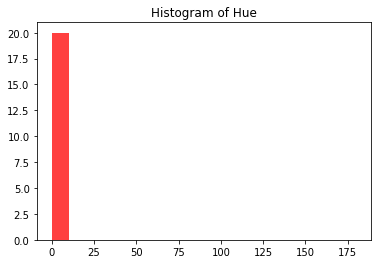

In [256]:
hn, hbins, hpatches = plt.hist(skin_colors[:,0], bins=18, range=(0, 180), facecolor='r', alpha=0.75)
hcm = plt.cm.get_cmap('hsv')

hbin_centers = 0.5 * (hbins[:-1] + hbins[1:])

# scale values to interval [0,1]
hcol = hbin_centers - min(hbin_centers)
hcol /= max(hcol)

for c, p in zip(hcol, hpatches):
    plt.setp(p, 'facecolor', hcm(c))

plt.title('Histogram of Hue')
plt.show()

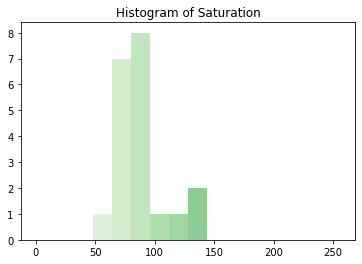

In [257]:
sn, sbins, spatches = plt.hist(skin_colors[:,1], bins=16, range=(0, 256), facecolor='y', alpha=0.75)

scm = plt.cm.get_cmap('Greens')

sbin_centers = 0.5 * (sbins[:-1] + sbins[1:])

# scale values to interval [0,1]
scol = sbin_centers - min(sbin_centers)
scol /= max(scol)

for c, p in zip(scol, spatches):
    plt.setp(p, 'facecolor', scm(c))

plt.title('Histogram of Saturation')
plt.show()

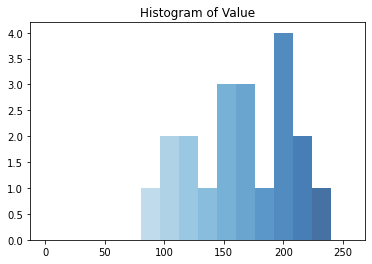

In [258]:
vn, vbins, vpatches = plt.hist(skin_colors[:,2], bins=16, range=(0, 256), facecolor='g', alpha=0.75)

vcm = plt.cm.get_cmap('Blues')

vbin_centers = 0.5 * (vbins[:-1] + vbins[1:])

# scale values to interval [0,1]
vcol = vbin_centers - min(vbin_centers)
vcol /= max(vcol)

for c, p in zip(vcol, vpatches):
    plt.setp(p, 'facecolor', vcm(c))


plt.title('Histogram of Value')
plt.show()